# Diamonds

https://4cs.gia.edu/en-us/blog/gia-diamond-grading-scales/

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# algoritmos para modelado
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
# particionamiento y validación
from sklearn.model_selection import train_test_split, cross_val_score

## Carga de datos y estadísticas mínimas

In [30]:
df = sns.load_dataset('titanic').dropna(subset=['age', 'fare'])  # eliminamos nulos en numéricas clave
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [31]:
df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,714.000000,714.000000,714,714.000000,714.000000,714.000000,714.000000,712,714,714,714,184,712,714,714
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,453,NaN,NaN,NaN,NaN,554,355,413,413,51,554,424,404
mean,0.406162,2.236695,NaN,29.699118,0.512605,0.431373,34.694514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.491460,0.838250,NaN,14.526497,0.929783,0.853289,52.918930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,1.000000,NaN,20.125000,0.000000,0.000000,8.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,2.000000,NaN,28.000000,0.000000,0.000000,15.741700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,1.000000,33.375000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           530
embark_town      2
alive            0
alone            0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     714 non-null    int64   
 1   pclass       714 non-null    int64   
 2   sex          714 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        714 non-null    int64   
 5   parch        714 non-null    int64   
 6   fare         714 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        714 non-null    category
 9   who          714 non-null    object  
 10  adult_male   714 non-null    bool    
 11  deck         184 non-null    category
 12  embark_town  712 non-null    object  
 13  alive        714 non-null    object  
 14  alone        714 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 70.2+ KB


In [34]:
# Opcional: Se puede usar ydata-profiling para hacer un profiling que muestre unos EDAs automáticos
# Mejor en otro notebook porque si hay muchos datos va lento

In [35]:
df[df.duplicated()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
133,1,2,female,29.00,1,0,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
173,0,3,male,21.00,0,0,7.9250,S,Third,man,True,NaN,Southampton,no,True
213,0,2,male,30.00,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
313,0,3,male,28.00,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
320,0,3,male,22.00,0,0,7.2500,S,Third,man,True,NaN,Southampton,no,True
343,0,2,male,25.00,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
355,0,3,male,28.00,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
418,0,2,male,30.00,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
476,0,2,male,34.00,1,0,21.0000,S,Second,man,True,NaN,Southampton,no,False
488,0,3,male,30.00,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [36]:
# En este caso pruebo a borrar duplicados
# pero normalmente nos interesa mantenerlos porque pueden reflejar la realidad del dataset
df.drop_duplicates(inplace=True)

In [37]:
df[df.duplicated()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


## EDA

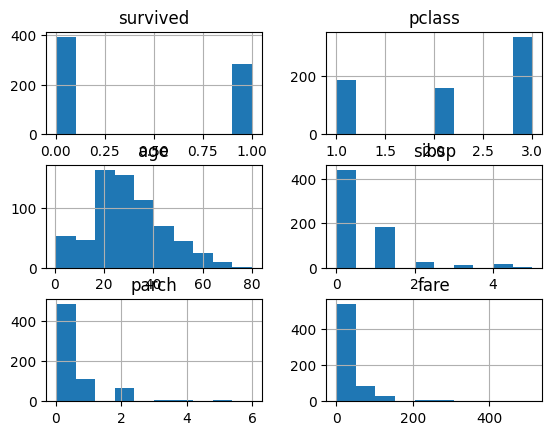

In [38]:
df.hist();

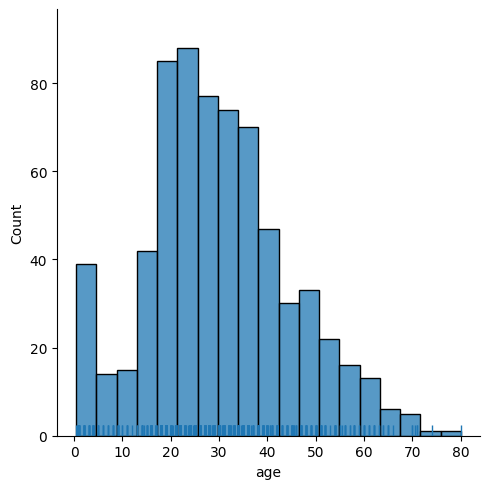

In [39]:
sns.displot(df, x='age', rug=True)

<Axes: xlabel='fare', ylabel='Density'>

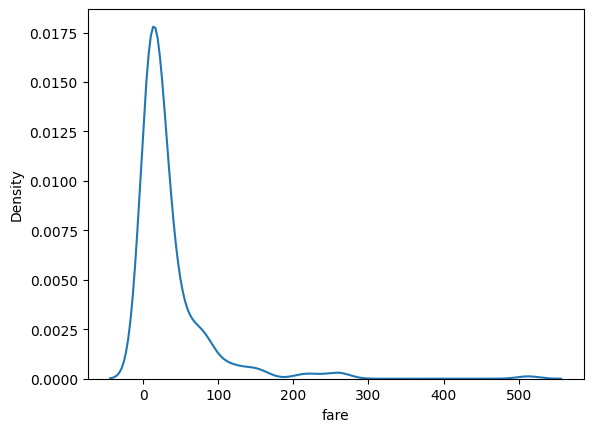

In [40]:
sns.kdeplot(df, x='fare')

<Axes: xlabel='fare'>

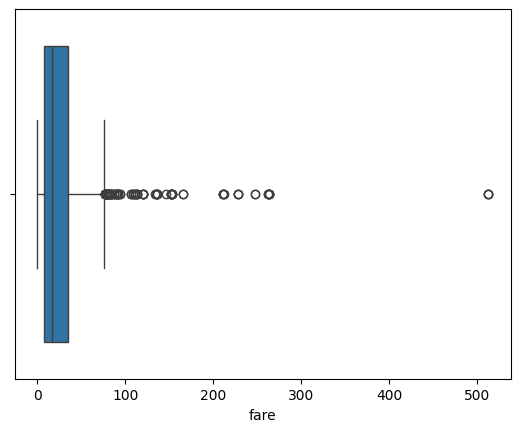

In [41]:
sns.boxplot(df, x='fare')

<Axes: xlabel='class', ylabel='count'>

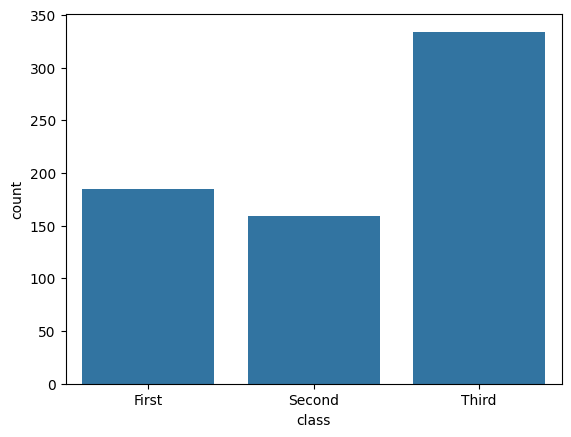

In [42]:
sns.countplot(df, x='class')

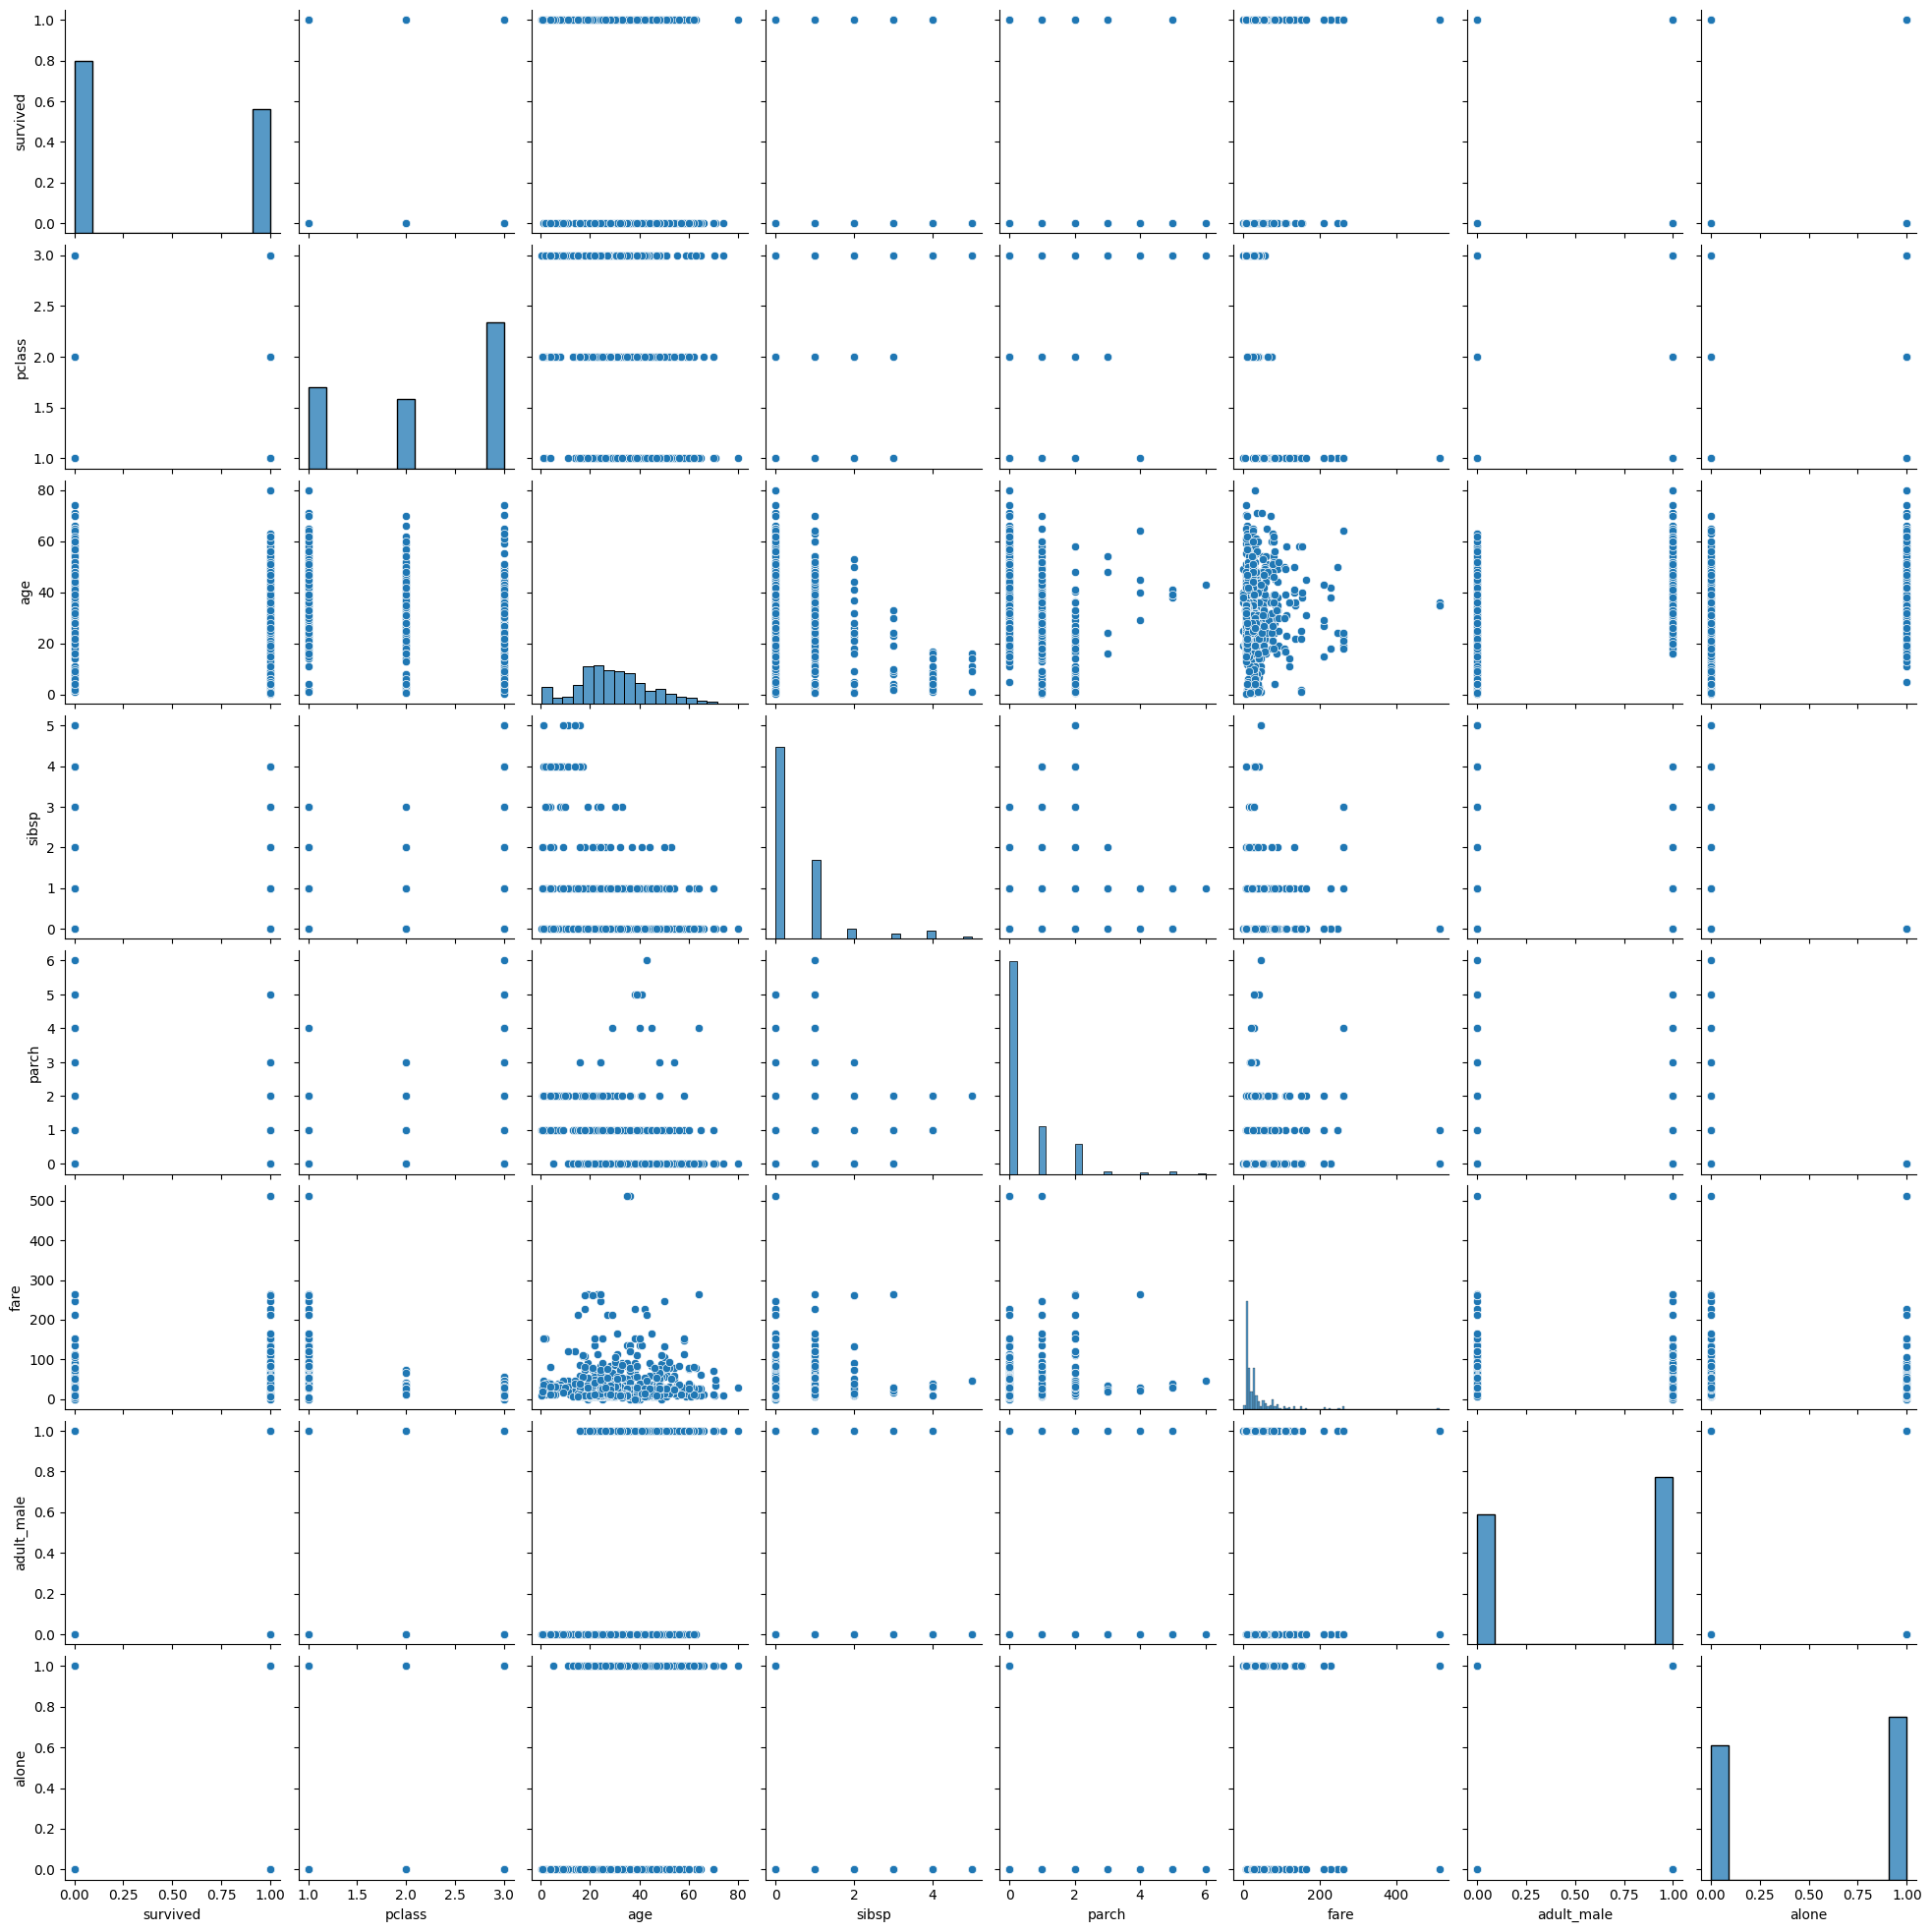

In [43]:
sns.pairplot(df)

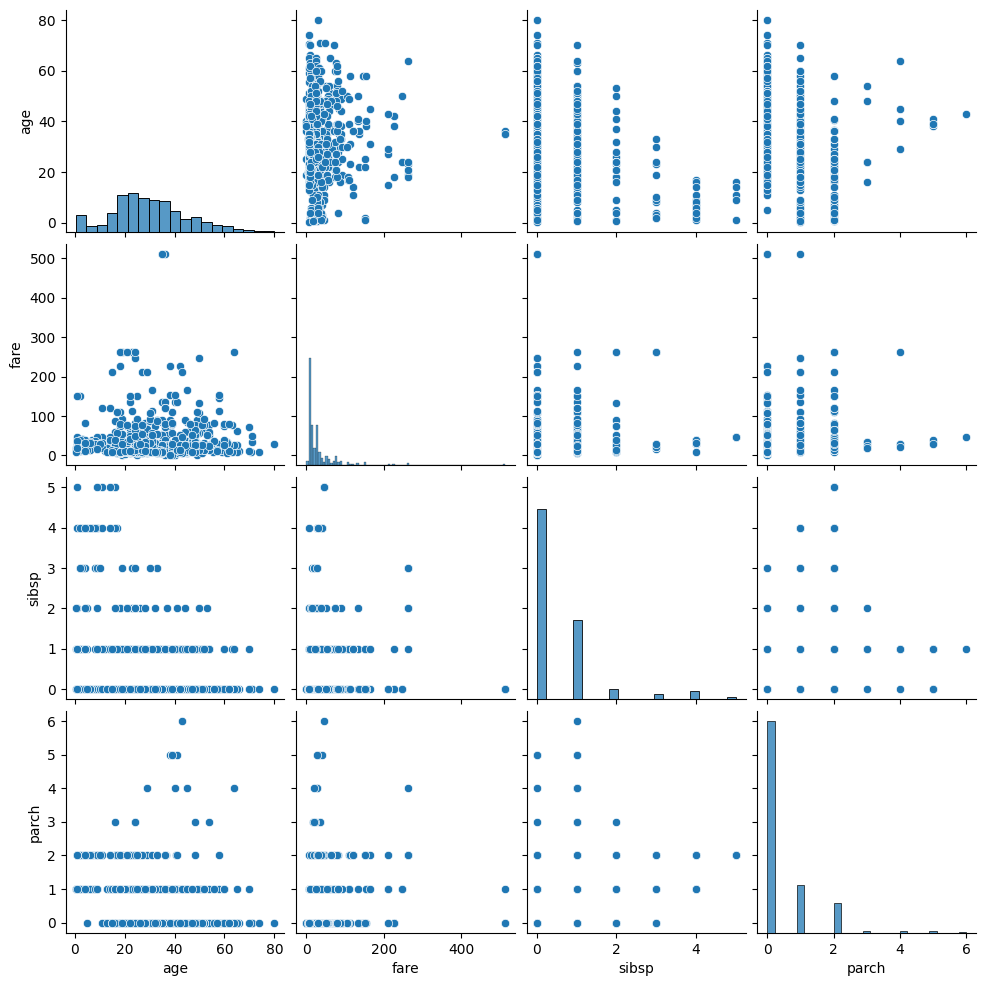

In [44]:
sns.pairplot(df[['age', 'fare', 'sibsp', 'parch']])

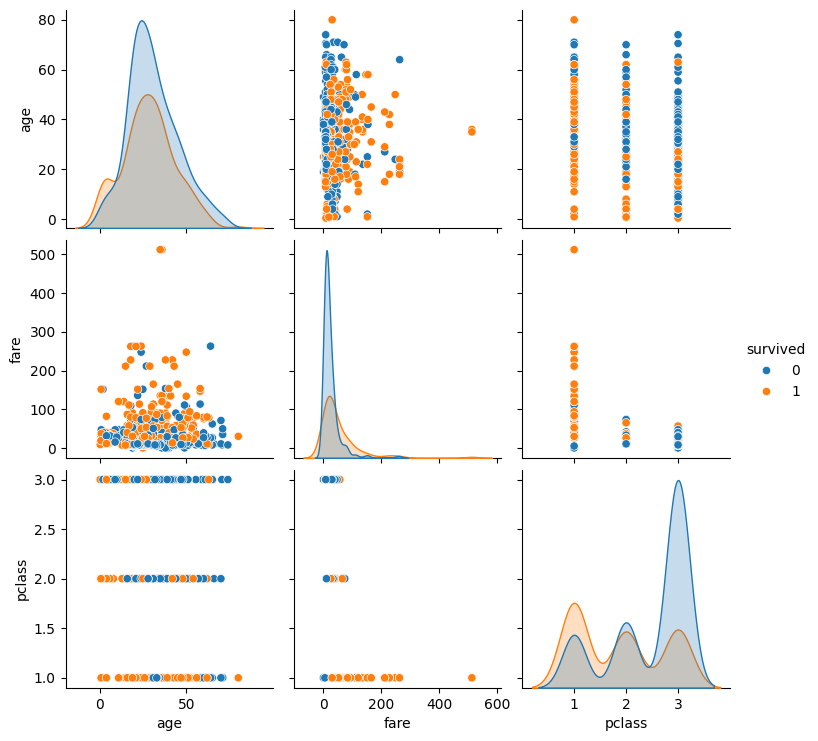

In [45]:
sns.pairplot(df[['age', 'fare', 'pclass', 'survived']], hue='survived')

In [46]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

<Axes: >

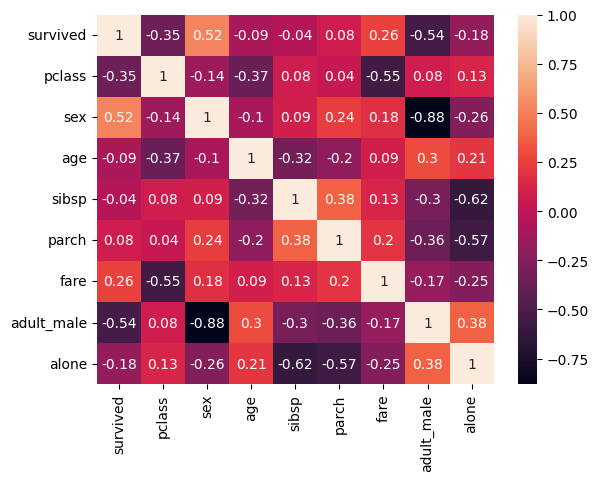

In [47]:
sns.heatmap(df.corr(numeric_only=True).round(2), annot=True)

## Regresión 


In [48]:
X = df[['age', 'fare', 'pclass', 'sibsp', 'parch']]
y = df['survived']

In [49]:
# sin particionamiento
model = LinearRegression()
model.fit(X, y)
model.score(X, y) # score R2 en sobre datos de train

0.1962005753336452

In [50]:
# particionamiento: solo se entrena y valida una vez:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
print('score train', model.score(X_train, y_train)) # score R2 en sobre datos de train
print('score test', model.score(X_test, y_test)) # score R2 en sobre datos de test

score train 0.2134263852086158
score test 0.10370782080526586


In [51]:
# más sofisticado: particionamiento y validación cruzada:
# https://scikit-learn.org/1.5/modules/cross_validation.html
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model = LinearRegression()

results = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print('r2 cv', results.mean())

# Validación final sobre los datos de test
model.fit(X_train, y_train)
print('score train', model.score(X_train, y_train)) # score R2 en sobre datos de train
print('score test', model.score(X_test, y_test)) # score R2 en sobre datos de train

r2 cv 0.18990087335971978
score train 0.2134263852086158
score test 0.10370782080526586


## Clasificación

In [52]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [53]:
df['class'].value_counts()

class
Third     334
First     185
Second    159
Name: count, dtype: int64

In [54]:
# Crear diccionarios de mapeo para columnas categóricas relevantes
class_map = {'Third': 1, 'Second': 2, 'First': 3}
embarked_map = {'S': 1, 'C': 2, 'Q': 3}
who_map = {'man': 1, 'woman': 2, 'child': 3}

# Aplicar map para convertir las columnas a enteros
df['class_int'] = df['class'].map(class_map)
df['embarked_int'] = df['embarked'].map(embarked_map)
df['who_int'] = df['who'].map(who_map)

# Ejemplo de selección de variables para X e y
X = df[['age', 'fare', 'pclass', 'sibsp', 'parch', 'class_int', 'embarked_int', 'who_int']]
y = df['survived']


In [55]:
from sklearn.impute import SimpleImputer, KNNImputer

# Imputar valores faltantes antes de entrenar el modelo
numerical_cols = X_train.select_dtypes(include=[np.number]).columns
categorical_cols = X_train.select_dtypes(exclude=[np.number]).columns

# Imputación numérica
imputer_num = KNNImputer()
X_train_num = imputer_num.fit_transform(X_train[numerical_cols])
X_test_num = imputer_num.transform(X_test[numerical_cols])
X_train_num = pd.DataFrame(X_train_num, columns=numerical_cols, index=X_train.index)
X_test_num = pd.DataFrame(X_test_num, columns=numerical_cols, index=X_test.index)

# Imputación categórica solo si hay columnas categóricas
if len(categorical_cols) > 0:
	imputer_cat = SimpleImputer(strategy='most_frequent')
	X_train_cat = imputer_cat.fit_transform(X_train[categorical_cols])
	X_test_cat = imputer_cat.transform(X_test[categorical_cols])
	X_train_cat = pd.DataFrame(X_train_cat, columns=categorical_cols, index=X_train.index)
	X_test_cat = pd.DataFrame(X_test_cat, columns=categorical_cols, index=X_test.index)

	# Concatenar de nuevo
	X_train_clean = pd.concat([X_train_num, X_train_cat], axis=1)
	X_test_clean = pd.concat([X_test_num, X_test_cat], axis=1)
else:
	X_train_clean = X_train_num
	X_test_clean = X_test_num

model = LogisticRegression(max_iter=10_000)

results = cross_val_score(model, X_train_clean, y_train, cv=5, scoring='accuracy')
print('accuracy cv', results.mean())

# Validación final sobre los datos de test
model.fit(X_train_clean, y_train)
print('score train', model.score(X_train_clean, y_train)) # score accuracy en sobre datos de train
print('score test', model.score(X_test_clean, y_test)) # score accuracy en sobre datos de test

accuracy cv 0.6936119605844377
score train 0.7121771217712177
score test 0.6691176470588235


## Preprocesado diamonds sin pipeline

Probar Imputers

Probar Scaler 

Probar OrdinalEncoder

Probar OneHotEncoder

Probar LabelEncoder

Primero manual y luego con Pipeline

In [56]:
df = sns.load_dataset('titanic').sample(500, random_state=42)
df['age'] = df['age'].replace(0.00, np.nan)
df['fare'] = df['fare'].replace(0.00, np.nan)


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 709 to 100
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     500 non-null    int64   
 1   pclass       500 non-null    int64   
 2   sex          500 non-null    object  
 3   age          402 non-null    float64 
 4   sibsp        500 non-null    int64   
 5   parch        500 non-null    int64   
 6   fare         492 non-null    float64 
 7   embarked     498 non-null    object  
 8   class        500 non-null    category
 9   who          500 non-null    object  
 10  adult_male   500 non-null    bool    
 11  deck         115 non-null    category
 12  embark_town  498 non-null    object  
 13  alive        500 non-null    object  
 14  alone        500 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 49.3+ KB


In [58]:
print(df.select_dtypes(include=[np.number]).columns, 'numerical_columns')
print(df.select_dtypes(exclude=[np.number]).columns, 'categorical_columns')

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object') numerical_columns
Index(['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object') categorical_columns


In [59]:
df = df.dropna()

In [60]:
X = df.drop('survived', axis=1)
y = df['survived']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(X_train.isna().sum()) # Ya no hay nulos
print(X_test.isna().sum())

pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


CUIDADO:

fit_transform devuelven arrays de numpy, si queremos pasarlos a pandas hay que hacerlo con cuidado de no perder los tipos de dato ni nombres de columnas porque si no cosas como estas pueden fallar: "X_train.select_dtypes(include=[np.number]).columns"

In [62]:
# 1. rellenar valores faltantes
from sklearn.impute import SimpleImputer,KNNImputer

numerical_cols = X_train.select_dtypes(include=[np.number]).columns
categorical_cols = X_train.select_dtypes(exclude=[np.number]).columns
print(numerical_cols)
print(categorical_cols)

# numericas
imputer_num = KNNImputer()
X_train_numerical = imputer_num.fit_transform(X_train[numerical_cols]) # convierte de dataframe a array de numpy
X_test_numerical = imputer_num.transform(X_test[numerical_cols])
X_train_numerical = pd.DataFrame(X_train_numerical, columns=numerical_cols, index=X_train.index) #convertir a dataframe
X_test_numerical = pd.DataFrame(X_test_numerical, columns=numerical_cols, index=X_test.index)


#categóricas
imputer_cat = SimpleImputer(strategy='most_frequent')
X_train_categorical = imputer_cat.fit_transform(X_train[categorical_cols])
X_test_categorical = imputer_cat.transform(X_test[categorical_cols])
X_train_categorical = pd.DataFrame(X_train_categorical, columns=categorical_cols, index=X_train.index).astype(str)
X_test_categorical = pd.DataFrame(X_test_categorical, columns=categorical_cols, index=X_test.index).astype(str)


# Problema, si concatenamos con numpy podemos perder luego los data types, te lo pasa todo a texto
# X_train_array = np.concatenate([X_train_numerical, X_train_categorical], axis=1)
# X_test_array = np.concatenate([X_test_numerical, X_test_categorical], axis=1)

# opcional: pasar a dataframes de pandas para tener nombres de columnas
# X_train_imputed = pd.DataFrame(X_train_array, columns = X_train.columns, index=X_train.index)
# X_test_imputed = pd.DataFrame(X_test_array, columns = X_test.columns, index=X_test.index)

X_train_imputed = pd.concat([X_train_numerical, X_train_categorical], axis=1)
X_test_imputed = pd.concat([X_test_numerical, X_test_categorical], axis=1)

print(X_train_imputed.isna().sum()) # Ya no hay nulos
print(X_test_imputed.isna().sum()) # Ya no hay nulos

numerical_cols = X_train_imputed.select_dtypes(include=[np.number]).columns
categorical_cols = X_train_imputed.select_dtypes(exclude=[np.number]).columns
print(numerical_cols)
print(categorical_cols)

Index(['pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')
Index(['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
pclass         0
age            0
sibsp          0
parch          0
fare           0
sex            0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64
pclass         0
age            0
sibsp          0
parch          0
fare           0
sex            0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64
Index(['pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')
Index(['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [63]:
X_train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 662 to 449
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       80 non-null     float64
 1   age          80 non-null     float64
 2   sibsp        80 non-null     float64
 3   parch        80 non-null     float64
 4   fare         80 non-null     float64
 5   sex          80 non-null     object 
 6   embarked     80 non-null     object 
 7   class        80 non-null     object 
 8   who          80 non-null     object 
 9   adult_male   80 non-null     object 
 10  deck         80 non-null     object 
 11  embark_town  80 non-null     object 
 12  alive        80 non-null     object 
 13  alone        80 non-null     object 
dtypes: float64(5), object(9)
memory usage: 9.4+ KB


In [64]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

numerical_columns = X_train_imputed.select_dtypes(include=[np.number]).columns # np.number alternativa
print(numerical_columns, 'numerical_columns')
categorical_columns = X_train_imputed.select_dtypes(exclude=[np.number]).columns
print(categorical_columns, 'categorical_columns')

encoder = OneHotEncoder(sparse_output=False) # sparse_output=False para obtenerlo como matriz de 0s y 1s , probar drop='first'
X_train_encoded = encoder.fit_transform(X_train_imputed[categorical_columns]) # array de numpy con las codificaciones
X_test_encoded = encoder.transform(X_test_imputed[categorical_columns])

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed[numerical_columns])
X_test_scaled = scaler.transform(X_test_imputed[numerical_columns])

X_train_final = pd.concat(
    [
        pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out()).reset_index(drop=True), # categoricas
        pd.DataFrame(X_train_scaled, columns=numerical_columns).reset_index(drop=True) # numéricas
    ],
    axis=1
)
X_test_final = pd.concat(
    [
        pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out()).reset_index(drop=True), # categoricas
        pd.DataFrame(X_test_scaled, columns=numerical_columns).reset_index(drop=True) # numéricas
    ],
    axis=1
)

Index(['pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object') numerical_columns
Index(['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object') categorical_columns


In [65]:
X_train_final.head()

,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,who_child,who_man,...,embark_town_Southampton,alive_no,alive_yes,alone_False,alone_True,pclass,age,sibsp,parch,fare
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.657534,0.000000,0.0,0.070247
1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.657534,0.000000,0.0,0.120815
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.628995,0.000000,0.0,0.074016
3,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.514840,0.333333,0.5,0.175854
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.543379,0.333333,0.5,0.295705


## SImplificado gracias a pipelines

In [66]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# pipeline numéricas
numerical_cols = X_train.select_dtypes(include=[np.number]).columns
pipeline_numerical = make_pipeline(
    KNNImputer(n_neighbors=7),
    MinMaxScaler(), 
)

# pipeline categóricas
categorical_cols = X_train.select_dtypes(exclude=[np.number]).columns
pipeline_categorical = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(sparse_output=False)
)

# unir pipelines con ColumnTransformer unir cols num y cat
pipeline_all = ColumnTransformer([
    ('numeric', pipeline_numerical, numerical_cols),
    ('categorical', pipeline_categorical, categorical_cols)
])

# pipeline final con el modelo
pipeline = make_pipeline(
    pipeline_all,
    LinearRegression()
)
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer(n_neighbors=7)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  Index(['pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  Index(['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object'))])),
                ('linearregression', LinearRegression())])

In [67]:
from sklearn.metrics import r2_score
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
r2_score(y_test, y_pred)

1.0

2 opciones:

* Manual: 
    * numéricas: imputer, scaler, powertransform
    * categóricas: imputer, ordinalencoder (si hay orden inherente) o onehotencoder si no hay orden
    * Problema, hacer manualmente los fit_transform y transform sobre X_train y X_test y luego hay que mergearlo para luego usarlo en el modelo

* Automático:
    * pipeline para numéricas
    * pipeline para categóricas
    * unir pipelines con ColumnTransformer
    * pipeline con todo junto con el modelo

In [68]:
from sklearn.preprocessing import OrdinalEncoder

# Definir el orden para la columna 'class'
class_order = ['Third', 'Second', 'First']

encoder = OrdinalEncoder(categories=[class_order])
df['class_encoded'] = encoder.fit_transform(df[['class']]).astype(np.int8)
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,class_encoded
136,1,1,female,19.0,0,2,26.2833,S,First,woman,False,D,Southampton,yes,False,2
137,0,1,male,37.0,1,0,53.1000,S,First,man,True,C,Southampton,no,False,2
853,1,1,female,16.0,0,1,39.4000,S,First,woman,False,D,Southampton,yes,False,2
621,1,1,male,42.0,1,0,52.5542,S,First,man,True,D,Southampton,yes,False,2
110,0,1,male,47.0,0,0,52.0000,S,First,man,True,C,Southampton,no,True,2


Pipeline con numerical + categorical + OrdinalEncoder para columnas específicas:

In [69]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# Columnas numéricas y categóricas
numerical_cols = X_train.select_dtypes(include=[np.number]).columns
# Ejemplo de columnas ordinales en Titanic (puedes ajustar según tu criterio)
ordinal_cols = ['class']
categorical_cols = [col for col in X_train.select_dtypes(exclude=[np.number]).columns if col not in ordinal_cols]

# Orden para la columna 'class'
class_order = ['Third', 'Second', 'First']

# Pipeline numéricas
pipeline_numerical = make_pipeline(
    KNNImputer(n_neighbors=7),
    MinMaxScaler()
)

# Pipeline ordinales
pipeline_ordinal = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OrdinalEncoder(categories=[class_order], dtype=np.int8)
)

# Pipeline categóricas
pipeline_categorical = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(sparse_output=False, handle_unknown='ignore')
)

# ColumnTransformer
pipeline_all = ColumnTransformer([
    ('numeric', pipeline_numerical, numerical_cols),
    ('ordinal', pipeline_ordinal, ordinal_cols),
    ('categorical', pipeline_categorical, categorical_cols)
])

# Pipeline final con modelo
pipeline = make_pipeline(
    pipeline_all,
    LinearRegression()
)
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer(n_neighbors=7)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  Index(['pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncode...',
                                                                                               'Second',
                                                                                               'First']],
                                                                                  dtype=<class 'numpy.int8'>))]),
                                                  ['class']),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['sex', 'embarked', 'who',
                                                   'adult_male', 'deck',
                                                   'embark_town', 'alive',
                                                   'alone'])])),
                ('linearregression', LinearRegression())])

In [70]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
r2_score(y_test, y_pred)

1.0

In [71]:
import joblib
joblib.dump(pipeline, 'pipeline.joblib')

['pipeline.joblib']